In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 6.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2014-12-27,428.9
2014-12-28,447.0
2014-12-29,516.3


In [8]:
y_w=y.resample('M').mean()
y_w

,GHI
Date,
2000-01-31,509.112903
2000-02-29,569.260714
2000-03-31,660.396774
2000-04-30,627.550000
2000-05-31,622.890323
...,...
2014-08-31,575.948387
2014-09-30,583.713333
2014-10-31,508.854839


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-31,509.112903
2000-02-29,569.260714
2000-03-31,660.396774
2000-04-30,627.550000
2000-05-31,622.890323
...,...
2011-08-31,567.396774
2011-09-30,594.750000
2011-10-31,521.545161


In [10]:
y[:4380]

,GHI
Date,
2000-01-01,563.3
2000-01-02,588.0
2000-01-03,325.7
2000-01-04,573.9
2000-01-05,572.7
...,...
2011-12-27,446.2
2011-12-28,520.9
2011-12-29,525.3


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(0,5474,365):
  for j in datesInYr:
    X_add = y[i:i+j]
    #print(i,j)
    X_T.append(X_add)
    i+=j
X_T=np.asarray(X_T)
X_T.shape

(180,)

In [14]:
X_T

array([array([563.3, 588. , 325.7, 573.9, 572.7, 375.6, 221.3, 283.9, 272.5,
       284.1, 263.4, 506. , 544. , 477. , 283.8, 467.2, 593.6, 598.6,
       619. , 627.3, 623.3, 635.6, 612.2, 629.7, 625. , 601.3, 599.8,
       576.5, 570.1, 618.1, 650. ]),
       array([642.1, 545.6, 378.2, 308. , 563.6, 535.9, 563.4, 611.8, 582.4,
       573.4, 623.2, 640.1, 637.4, 651.6, 605.3, 626.9, 632.5, 663.2,
       653.6, 614.8, 648. , 478.8, 647.5, 479.8, 547.5, 621.3, 642.3,
       221.1]),
       array([676.2, 686.7, 672.4, 670. , 680.2, 532.7, 676.5, 662.7, 675.8,
       662.6, 673.1, 686.4, 684.8, 671. , 671.7, 652.8, 689.3, 675. ,
       694.7, 699. , 705.3, 705.2, 497.5, 384.5, 686.7, 682.6, 654.5,
       688. , 695.4, 673.7, 705.3]),
       array([495.7, 499.8, 597.1, 583.8, 545.1, 521.2, 561.3, 679.1, 686.9,
       687.5, 676.9, 679.8, 686.7, 674.4, 688.4, 663.4, 682.3, 670.9,
       642.8, 629.3, 673.4, 539.5, 665.8, 500.7, 674.2, 615.8, 616. ,
       677.9, 675.7, 635.1]),
       array

In [15]:
for new in X_T[0:144:12]:
  print(len(new))

31
31
31
31
31
31
31
31
31
31
31
31


In [16]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(180,)

In [17]:
foo=[x.tolist() for x in X_T[0:144:12]]
foo_1=np.array(foo)
foo_1.shape

(12, 31)

In [18]:
Y_T[j:144:12]

array([543.55483871, 564.1516129 , 548.25483871, 599.17741935,
       575.36129032, 582.82258065, 563.67096774, 582.94516129,
       532.65483871, 567.39677419])

In [19]:
from keras.models import Sequential
from keras.layers import Dense

modelList=[]
j=0
for i in datesInYr:
  model = Sequential()
  model.add(Dense(100, activation='relu', input_dim=i))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  foo=[xd.tolist() for xd in X_T[j:144:12]]
  foo_1=np.array(foo)
  # fit model
  model.fit(foo_1, Y_T[j:144:12], epochs=2000, verbose=0)
  modelList.append(model)
  j+=1

In [20]:
X_T[144].shape

(31,)

In [21]:
modelList

In [22]:
# demonstrate prediction
yhat=[]

datesInYr = [31,28,31,30,31,30,31,31,30,31,30,31]

for i in range(144,180):
  x_input = X_T[i]
  x_input = x_input.reshape((1,datesInYr[i%12]))
  print((i-144)%12)
  yRez = modelList[((i-144)%12)].predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

0
[[503.91003]]
1
[[636.08673]]
2
[[637.95404]]
3
[[588.63745]]
4
[[596.73596]]
5
[[573.95386]]
6
[[654.33575]]
7
[[431.02887]]
8
[[576.71606]]
9
[[444.84042]]
10
[[531.9081]]
11
[[487.78574]]
0
[[506.61362]]
1
[[682.7173]]
2
[[665.8498]]
3
[[620.12866]]
4
[[574.0158]]
5
[[517.0759]]
6
[[609.219]]
7
[[564.4622]]
8
[[615.46387]]
9
[[561.17975]]
10
[[489.13257]]
11
[[470.2655]]
0
[[503.4246]]
1
[[624.9111]]
2
[[619.9869]]
3
[[609.9587]]
4
[[541.9515]]
5
[[606.07916]]
6
[[634.3146]]
7
[[614.5346]]
8
[[580.99457]]
9
[[514.05756]]
10
[[389.42194]]
11
[[375.90616]]


[array([[503.91003]], dtype=float32),
 array([[636.08673]], dtype=float32),
 array([[637.95404]], dtype=float32),
 array([[588.63745]], dtype=float32),
 array([[596.73596]], dtype=float32),
 array([[573.95386]], dtype=float32),
 array([[654.33575]], dtype=float32),
 array([[431.02887]], dtype=float32),
 array([[576.71606]], dtype=float32),
 array([[444.84042]], dtype=float32),
 array([[531.9081]], dtype=float32),
 array([[487.78574]], dtype=float32),
 array([[506.61362]], dtype=float32),
 array([[682.7173]], dtype=float32),
 array([[665.8498]], dtype=float32),
 array([[620.12866]], dtype=float32),
 array([[574.0158]], dtype=float32),
 array([[517.0759]], dtype=float32),
 array([[609.219]], dtype=float32),
 array([[564.4622]], dtype=float32),
 array([[615.46387]], dtype=float32),
 array([[561.17975]], dtype=float32),
 array([[489.13257]], dtype=float32),
 array([[470.2655]], dtype=float32),
 array([[503.4246]], dtype=float32),
 array([[624.9111]], dtype=float32),
 array([[619.9869]], dt

In [23]:
len(yhat)

36

In [24]:
y_w[144:].index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

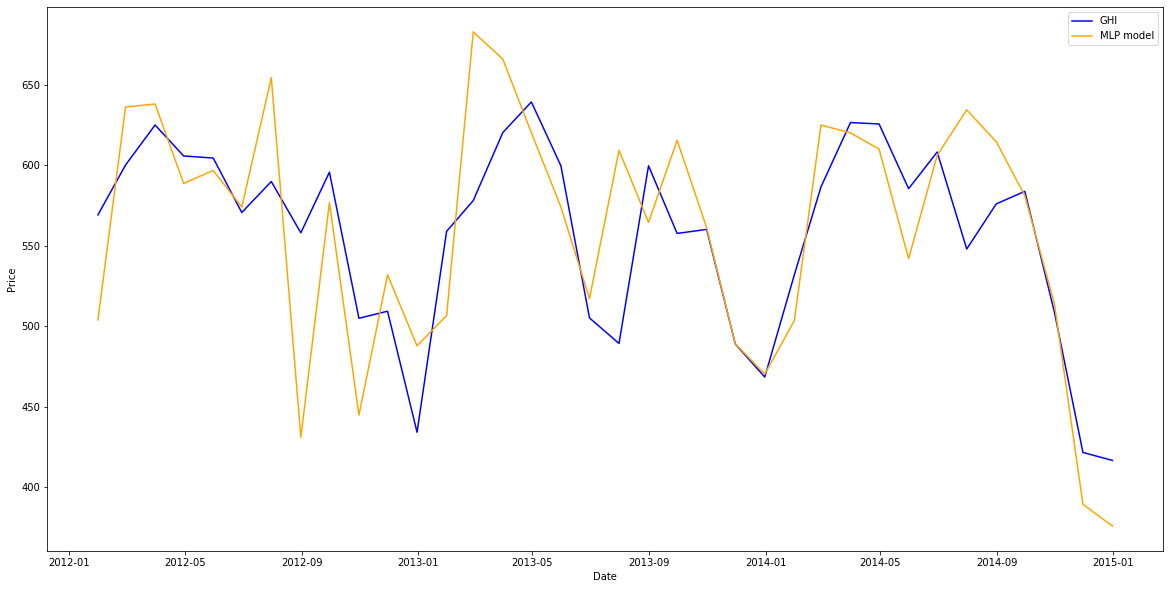

In [25]:
plt.figure(figsize = (20,10))
plt.plot(y_w[144:].index, y_w[144:], color= 'blue', label= 'GHI')
plt.plot(y_w[144:].index,np.asarray(yhat).reshape(36,) , color= 'orange', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
WriteDF = pd.DataFrame(columns=['Date', 'GHI'])
WriteDF['Date'] = y_w[144:].index
WriteDF['GHI'] = np.asarray(yhat).reshape(36,)
WriteDF.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/TamilNadu1/MLP_monthly.csv')

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[144:],np.asarray(yhat).reshape(36,),squared=False)

48.80847752593218

In [27]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[144:],np.asarray(yhat).reshape(36,))

0.066697319578547